In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
years = list(range(2010,2021))
data_folder = "england and wales data"
deaths_table = np.zeros((len(years),52))

In [4]:
for i in range(len(years)):
    yr = years[i]
    # format of the data changed from 2016
    # and then again in 2020 (for covid cases)
    # these values extract the right data
    after_16 = yr >= 2016
    sheet = 4 if yr == 2020 else 3
    row = 7 if yr == 2020 else 6

    # Find the data for the year (different years, different formats)
    filename = glob(f"{data_folder}/publishedweek*{yr}*.xls*")[0]
    year_data = pd.read_excel(filename, sheet_name=sheet)

    # add the weekly death data for the year (excluding week 53 if included that year)
    deaths_table[i] = year_data.iloc[row,1 + int(after_16):53 + int(after_16)]

# Plot the data

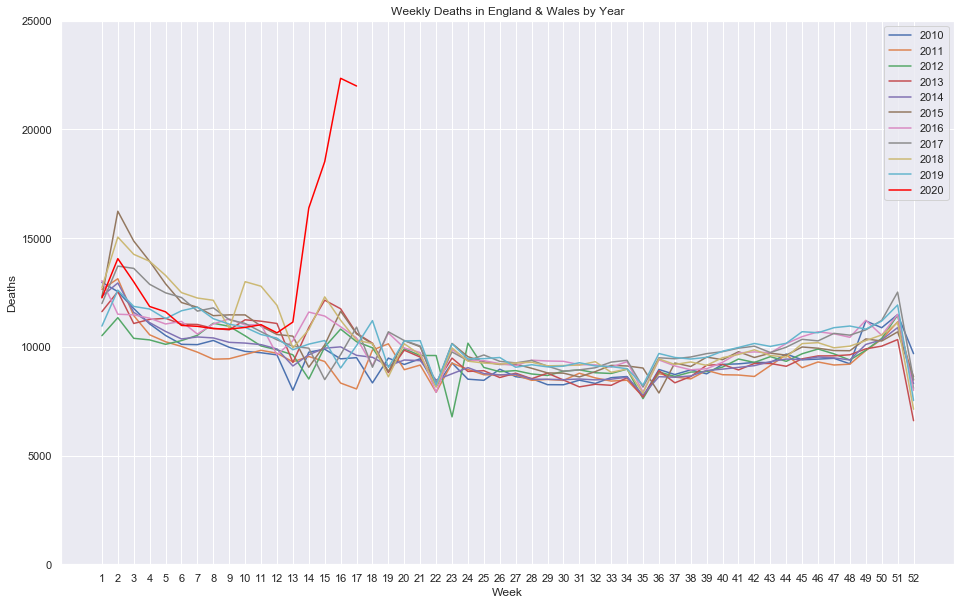

In [5]:
fig,ax = plt.subplots(figsize=(16,10))
for i in range(len(years)):
    color = "red" if years[i] == 2020 else None
    plt.plot(range(1,53), deaths_table[i], label=years[i], color=color)
plt.legend()
plt.xticks(range(1,53))
plt.ylim(0,25000)
plt.title("Weekly Deaths in England & Wales by Year")
plt.xlabel("Week")
plt.ylabel("Deaths")
plt.savefig("Deaths.png")
plt.show()